In [1]:
import pandas as pd
import numpy as np
import pymysql

In [9]:
# data from db

conn = pymysql.connect(
                host = 'localhost'
                , port = 3306
                , user = 'root'
                , password = '1234'
                , database= '로또'
                , charset = 'utf8mb4'
                )

cursor = conn.cursor()
table_name = '당첨번호'
sql = f"select * from {table_name} order by 날짜"

df = pd.read_sql(sql,conn)
df.head()

C:\Users\21ckw\AppData\Local\Temp\ipykernel_19200\3967003725.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,conn)


,no,회차,날짜,순서,당첨번호
0,8184,1,2002-12-07,1,10
1,8185,1,2002-12-07,2,23
2,8186,1,2002-12-07,3,29
3,8187,1,2002-12-07,4,33
4,8188,1,2002-12-07,5,37


In [16]:
# 숫자 간격으로 클러스터링할 데이터 셋 만기기
# group by 이후 사용할 함수

# df.drop(columns='no', inplace=True)

def calc_diffs(group):
    group = group.sort_values('순서')
    # 1_2, 2_3, ... 5_6
    diffs = group['당첨번호'].diff().iloc[1:6]
    return pd.Series(diffs.values, index=[f'diff_{i}_{i+1}' for i in range(1,6)])

df_diff = df.groupby(['회차','날짜']).apply(calc_diffs).reset_index()
df_diff

C:\Users\21ckw\AppData\Local\Temp\ipykernel_19200\1176640374.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_diff = df.groupby(['회차','날짜']).apply(calc_diffs).reset_index()


,회차,날짜,diff_1_2,diff_2_3,diff_3_4,diff_4_5,diff_5_6
0,1,2002-12-07,13.0,6.0,4.0,4.0,3.0
1,10,2003-02-08,16.0,5.0,3.0,8.0,3.0
2,100,2004-10-30,6.0,4.0,12.0,14.0,5.0
3,1000,2022-01-29,6.0,11.0,3.0,10.0,10.0
4,1001,2022-02-05,4.0,2.0,2.0,6.0,22.0
...,...,...,...,...,...,...,...
1165,995,2021-12-25,3.0,9.0,16.0,9.0,1.0
1166,996,2022-01-01,5.0,4.0,9.0,8.0,7.0
1167,997,2022-01-08,3.0,7.0,2.0,8.0,20.0
1168,998,2022-01-15,4.0,1.0,2.0,22.0,3.0


# 클러스터링

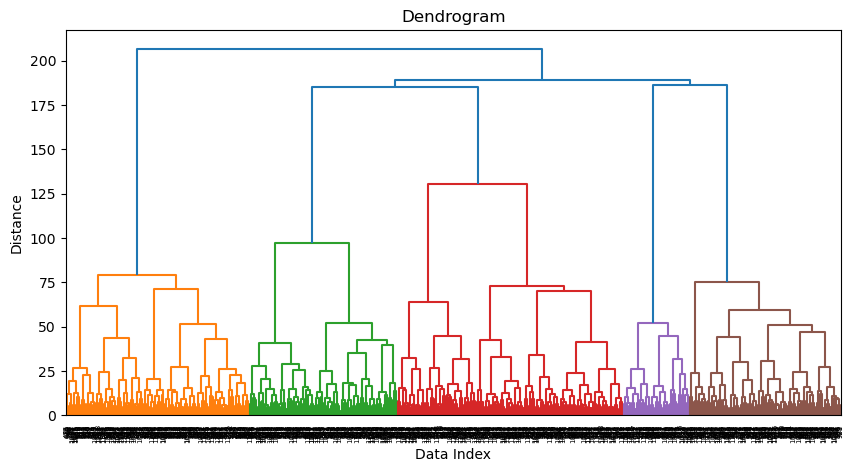

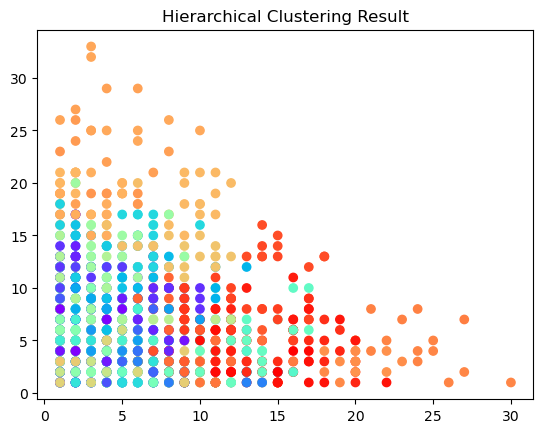

In [18]:
# 클러스터링
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 머신러닝 데이터 셋으로 만들기
X = df_diff[['diff_1_2','diff_2_3',	'diff_3_4',	'diff_4_5',	'diff_5_6']].to_numpy()

# 계층적 클러스터링
Z = linkage(X, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

# 거리 기준으로 군집 자르기 (군집 수 미리 정하지 않음, 거리 기준으로 자름)
max_d = 7  # 이 거리보다 긴 링크는 자름
clusters = fcluster(Z, max_d, criterion='distance')

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering Result')
plt.show()

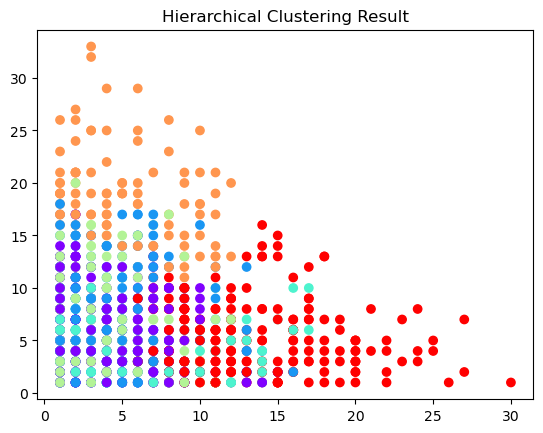

In [20]:
# 군집 나누기 (거리 기준 or 군집 수 기준)

clusters = fcluster(Z, t=6, criterion='maxclust')  # t: 원하는 군집 수

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering Result')
plt.show()

In [21]:
X

array([[13.,  6.,  4.,  4.,  3.],
       [16.,  5.,  3.,  8.,  3.],
       [ 6.,  4., 12., 14.,  5.],
       ...,
       [ 3.,  7.,  2.,  8., 20.],
       [ 4.,  1.,  2., 22.,  3.],
       [ 2.,  6.,  5.,  4., 10.]])